In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_dir = "d:/Projects/Celebrity-Face-Detection"

In [3]:
img = cv2.imread(main_dir + "/data/original/virat_kohli/0b43460429.jpg")
img.shape

(900, 1200, 3)

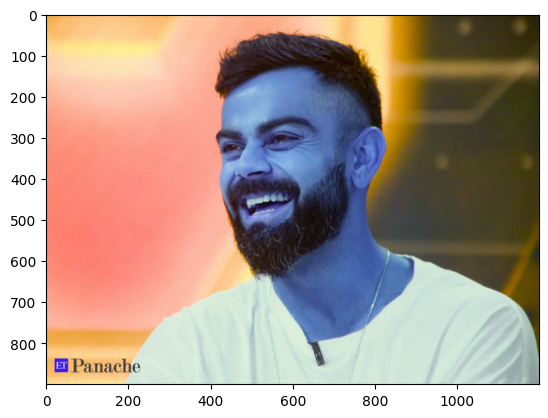

In [4]:
plt.imshow(img)
plt.show()

In [5]:
face_detector = cv2.CascadeClassifier(main_dir + "/haarcascades/haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier(main_dir + "/haarcascades/haarcascade_eye.xml")

In [6]:
face_detections = face_detector.detectMultiScale(img, scaleFactor=1.3, minNeighbors=10)
face_detections

eye_detections = eye_detector.detectMultiScale(img,1.3,5)
eye_detections

array([[515, 268,  84,  84],
       [412, 285,  79,  79]])

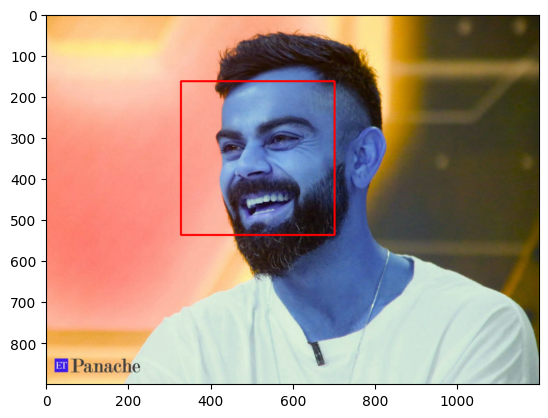

In [7]:
for x,y,w,h in face_detections:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(img)

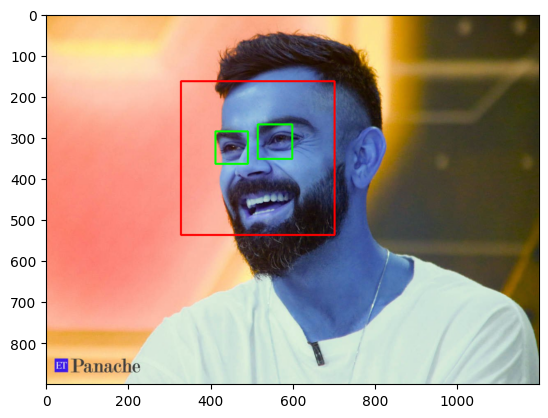

In [8]:
for ex, ey, ew, eh in eye_detections:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
plt.imshow(img)

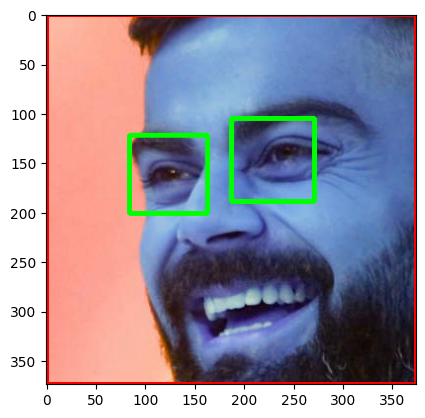

In [9]:
for x,y,w,h in face_detections:
    roi = img[y:y+h, x:x+w]
plt.imshow(roi)

In [18]:
face_detector = cv2.CascadeClassifier(main_dir + "/haarcascades/haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier(main_dir + "/haarcascades/haarcascade_eye.xml")
def get_roi(img_path):
    img = cv2.imread(img_path)
    face_detections = face_detector.detectMultiScale(img, 1.3, 5)
    for x,y,w,h in face_detections:
        roi = img[y:y+h, x:x+w]    
        eye_detections = eye_detector.detectMultiScale(img,1.3,5)
        if len(eye_detections) >= 2:
            return roi 

In [15]:
path_to_data = main_dir + "/data/original/"
path_to_crop_data = main_dir + "/data/cropped/"

In [16]:
img_data_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_data_dirs.append(entry.path)

img_data_dirs

['d:/Projects/Celebrity-Face-Detection/data/original/lionel_messi',
 'd:/Projects/Celebrity-Face-Detection/data/original/maria_sharapova',
 'd:/Projects/Celebrity-Face-Detection/data/original/roger_federer',
 'd:/Projects/Celebrity-Face-Detection/data/original/serena_williams',
 'd:/Projects/Celebrity-Face-Detection/data/original/virat_kohli']

In [19]:
celeb_file_name_dict = {}
crop_image_dir = []

for img_dir in img_data_dirs:
    count = 1
    celeb_name = img_dir.split('/')[-1]
    celeb_file_name_dict[celeb_name] = []
    
    for entry in os.scandir(img_dir):
        roi = get_roi(entry.path)
        if roi is not None:
            crop_folder = path_to_crop_data + celeb_name
            if not os.path.exists(crop_folder):
                os.makedirs(crop_folder)
                crop_image_dir.append(crop_folder)
            
            celeb_file_name = celeb_name + str(count) + '.jpg'
            celeb_file_path = crop_folder  + '/' + celeb_file_name
            
            cv2.imwrite(celeb_file_path, roi)
            celeb_file_name_dict[celeb_name].append(celeb_file_path)
            count += 1
    